In [1]:
!pip install soundfile

In [2]:
import cv2 #to preprocess images(open cv)
import os #to access file directories
import numpy as np # to deal with multidimensional matrices
from random import shuffle 
from tqdm import tqdm
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf 
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 

'''Setting up the env'''
  

IMG_SIZE = 150
LR = 1e-3

In [ ]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split

# all emotions on RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy"
}

In [4]:
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "/content/drive/My Drive/wav/Actor_01"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  104


In [5]:
x, sr = librosa.load('/content/drive/My Drive/wav/Actor_01/03-01-01-01-01-01-01.wav', sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(145676,) 44100


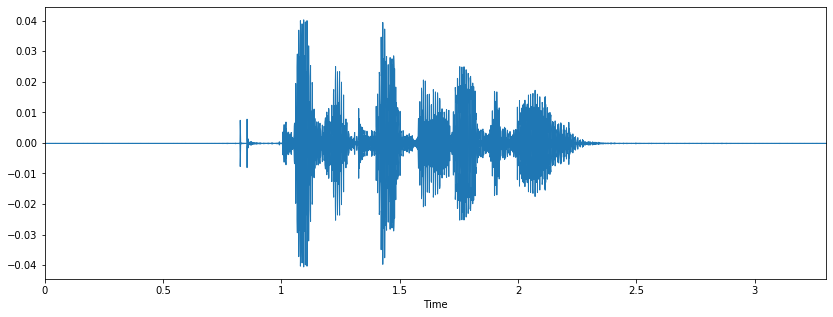

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

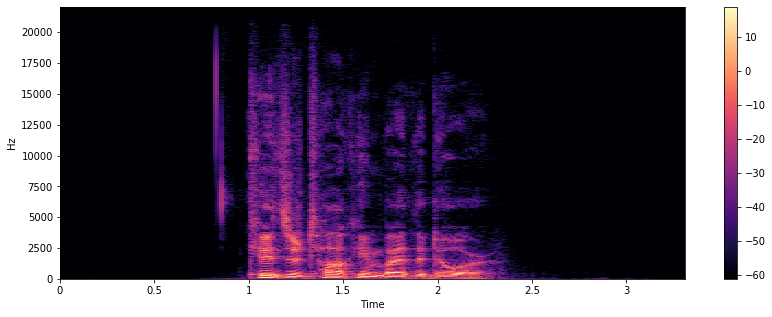

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

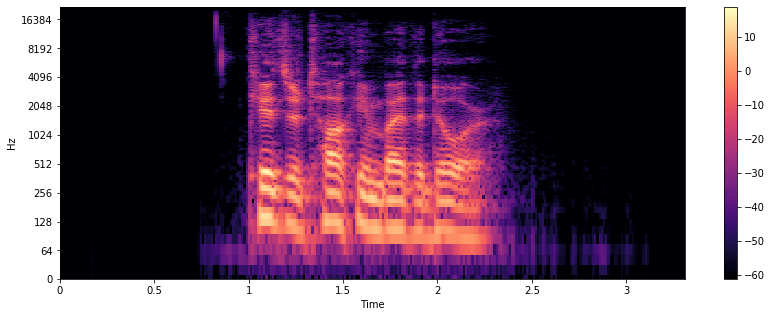

In [8]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
def label_img(emotion):
    # DIY One hot encoder
    if emotion == 'happy': return [1, 0,0,0]
    elif emotion == 'sad': return [0, 1,0,0]
    elif emotion=='angry' : return [0,0, 1,0]
    elif emotion=='neutral' : return [0,0,0,1]

In [ ]:
training_data=[]
# loading the training data 
def create_train_data(): 
  try :
    for file in glob.glob("/content/drive/My Drive/spectograms_audio/images_*/*.png"):
          # get the base name of the audio file
          basename = os.path.basename(file)
          print(basename)
          img=file
            # get the emotion label
          emotion = int2emotion[basename.split("-")[2]]
                  # we allow only AVAILABLE_EMOTIONS we set
          if emotion not in AVAILABLE_EMOTIONS:
            continue
          label = label_img(emotion) 
          
          path = os.path.join(file, img) 
          
                # loading the image from the path and then converting them into 
                # greyscale for easier covnet prob 
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
          
                # resizing the image for processing them in the covnet 
          img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
          
                # final step-forming the training data list with numpy array of the images 
          training_data.append([np.array(img), np.array(label)]) 
          
  except :
    pass
  return training_data

In [11]:
m=create_train_data()

03-01-01-01-01-02-24.wav.png
03-01-01-01-02-02-24.wav.png
03-01-01-01-02-01-24.wav.png
03-01-02-01-01-01-24.wav.png
03-01-01-01-01-01-24.wav.png
03-01-02-02-02-02-24.wav.png
03-01-02-01-01-02-24.wav.png
03-01-03-01-01-01-24.wav.png
03-01-02-01-02-01-24.wav.png
03-01-03-01-01-02-24.wav.png
03-01-02-02-01-01-24.wav.png
03-01-02-01-02-02-24.wav.png
03-01-03-01-02-01-24.wav.png
03-01-02-02-01-02-24.wav.png
03-01-02-02-02-01-24.wav.png
03-01-03-01-02-02-24.wav.png
03-01-04-01-01-02-24.wav.png
03-01-03-02-01-02-24.wav.png
03-01-03-02-01-01-24.wav.png
03-01-04-01-02-01-24.wav.png
03-01-04-01-02-02-24.wav.png
03-01-03-02-02-01-24.wav.png
03-01-03-02-02-02-24.wav.png
03-01-04-01-01-01-24.wav.png
03-01-04-02-01-01-24.wav.png
03-01-04-02-01-02-24.wav.png
03-01-05-01-02-02-24.wav.png
03-01-04-02-02-02-24.wav.png
03-01-04-02-02-01-24.wav.png
03-01-05-02-01-01-24.wav.png
03-01-05-01-01-02-24.wav.png
03-01-05-01-01-01-24.wav.png
03-01-05-01-02-01-24.wav.png
03-01-05-02-01-02-24.wav.png
03-01-05-02-02

In [12]:
t=np.array(training_data)
m

[[array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([0, 0, 0, 1])],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([0, 0, 0, 1])],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([0, 0, 0, 1])],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), ar

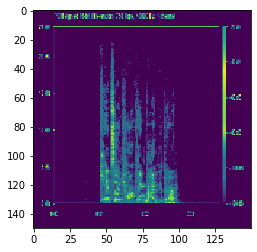

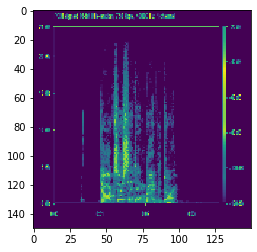

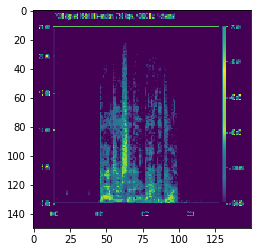

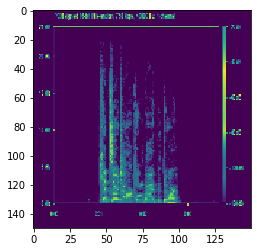

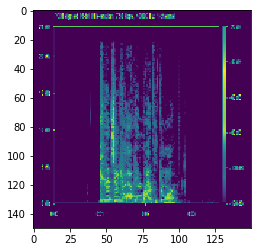

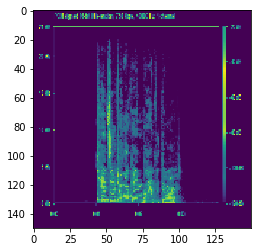

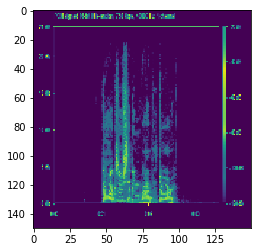

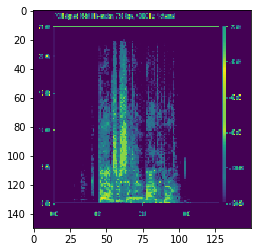

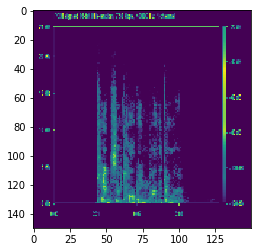

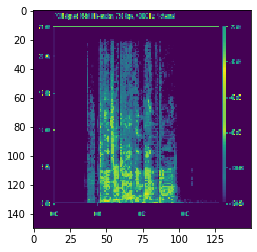

In [13]:
for img in training_data[:10] :
    plt.imshow(img[0])
    plt.show()

In [14]:
tf.reset_default_graph() 
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 4, activation ='softmax') 
convnet = regression(convnet, optimizer ='adam', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 
  
model = tflearn.DNN(convnet, tensorboard_dir ='log') 



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
keep_dims is deprecated, use keepdims instead





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







In [15]:
X = np.array([img[0] for img in m]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
Y = [img[1] for img in m] 
'''Fitting the data into our model'''
#model_name='cnn_model'
# epoch = 5 taken 
#model.fit({'input': np.array(X_train)}, {'targets': y_train}, n_epoch = 10,run_id=model_name) 
#Y.shape() 

'Fitting the data into our model'

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

In [17]:
model_name='cnn_model'
# epoch = 50 taken 
model.fit({'input': X_train}, {'targets': y_train}, n_epoch = 500,snapshot_step=300,show_metric=True,run_id=model_name)  

Training Step: 6999  | total loss: 0.16524 | time: 0.232s
| Adam | epoch: 500 | loss: 0.16524 - acc: 0.9819 -- iter: 832/837
Training Step: 7000  | total loss: 0.15480 | time: 0.252s
| Adam | epoch: 500 | loss: 0.15480 - acc: 0.9821 -- iter: 837/837
--


In [ ]:
 import sklearn.metrics as  metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

In [20]:
y_pred = model.predict(X_test)
report=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(np.argmax(y_test,axis=1) ,np.argmax(y_pred,axis=1))
print(matrix)
metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))*100 

              precision    recall  f1-score   support

           0       0.61      0.83      0.70        54
           1       0.74      0.57      0.65        61
           2       0.82      0.75      0.78        60
           3       0.65      0.63      0.64        35

    accuracy                           0.70       210
   macro avg       0.70      0.70      0.69       210
weighted avg       0.71      0.70      0.70       210

[[45  2  5  2]
 [11 35  5 10]
 [12  3 45  0]
 [ 6  7  0 22]]


70.0

SECOND


In [21]:
tf.reset_default_graph() 
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation ='relu') # added_2
convnet = max_pool_2d(convnet, 5)
  
convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
convnet = dropout(convnet, 0.8)    # added
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 

convnet = conv_2d(convnet, 32, 5, activation ='relu') #added_1
convnet = max_pool_2d(convnet, 5) 

convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 4, activation ='softmax') 
convnet = regression(convnet, optimizer ='rmsprop', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 

m = tflearn.DNN(convnet, tensorboard_dir ='log')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
model_name='cnn'
# epoch = 50 taken 
m.fit({'input': X_train}, {'targets': y_train}, n_epoch = 500,snapshot_step=300,show_metric=True,run_id=model_name)  

Training Step: 8399  | total loss: 0.37681 | time: 0.256s
| RMSProp | epoch: 600 | loss: 0.37681 - acc: 0.9722 -- iter: 832/837
Training Step: 8400  | total loss: 0.33953 | time: 0.276s
| RMSProp | epoch: 600 | loss: 0.33953 - acc: 0.9749 -- iter: 837/837
--


In [26]:
y_pred = m.predict(X_test)
report=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(np.argmax(y_test,axis=1) ,np.argmax(y_pred,axis=1))
print(matrix)
metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))*100 

              precision    recall  f1-score   support

           0       0.71      0.72      0.72        54
           1       0.79      0.67      0.73        61
           2       0.78      0.93      0.85        60
           3       0.68      0.60      0.64        35

    accuracy                           0.75       210
   macro avg       0.74      0.73      0.73       210
weighted avg       0.75      0.75      0.74       210

[[39  3 11  1]
 [ 7 41  4  9]
 [ 4  0 56  0]
 [ 5  8  1 21]]


74.76190476190476

Third

In [ ]:
tf.reset_default_graph() 
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 

  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 


convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 4, activation ='softmax') 
convnet = regression(convnet, optimizer ='adagrad', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 

n = tflearn.DNN(convnet, tensorboard_dir ='log')

In [28]:
model_name='c'
# epoch = 50 taken 
n.fit({'input': X_train}, {'targets': y_train}, n_epoch = 500,snapshot_step=300,show_metric=True,run_id=model_name)  

Training Step: 6999  | total loss: 0.14072 | time: 0.226s
| AdaGrad | epoch: 500 | loss: 0.14072 - acc: 0.9810 -- iter: 832/837
Training Step: 7000  | total loss: 0.13044 | time: 0.244s
| AdaGrad | epoch: 500 | loss: 0.13044 - acc: 0.9829 -- iter: 837/837
--


In [29]:
y_pred = n.predict(X_test)
report=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(np.argmax(y_test,axis=1) ,np.argmax(y_pred,axis=1))
print(matrix)
metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))*100 

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        54
           1       0.75      0.80      0.78        61
           2       0.92      0.78      0.85        60
           3       0.60      0.69      0.64        35

    accuracy                           0.76       210
   macro avg       0.75      0.75      0.75       210
weighted avg       0.77      0.76      0.77       210

[[40  4  4  6]
 [ 6 49  0  6]
 [ 8  1 47  4]
 [ 0 11  0 24]]


76.19047619047619

Fourth

In [ ]:
LR1=0.005
tf.reset_default_graph() 
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 

  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 


convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 4, activation ='softmax') 
convnet = regression(convnet, optimizer ='adagrad', learning_rate = LR1, 
      loss ='categorical_crossentropy', name ='targets') 

o = tflearn.DNN(convnet, tensorboard_dir ='log')

In [60]:
model_name='cn'
# epoch = 50 taken 
o.fit({'input': X_train}, {'targets': y_train}, n_epoch = 500,snapshot_step=300,show_metric=True,run_id=model_name)  

Training Step: 6999  | total loss: 0.00190 | time: 0.234s
| AdaGrad | epoch: 500 | loss: 0.00190 - acc: 0.9999 -- iter: 832/837
Training Step: 7000  | total loss: 0.00178 | time: 0.255s
| AdaGrad | epoch: 500 | loss: 0.00178 - acc: 0.9999 -- iter: 837/837
--


In [61]:
y_pred = o.predict(X_test)
report=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(np.argmax(y_test,axis=1) ,np.argmax(y_pred,axis=1))
print(matrix)
metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))*100 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        54
           1       0.80      0.84      0.82        61
           2       0.87      0.80      0.83        60
           3       0.71      0.63      0.67        35

    accuracy                           0.80       210
   macro avg       0.79      0.78      0.78       210
weighted avg       0.80      0.80      0.79       210

[[46  1  5  2]
 [ 2 51  1  7]
 [10  2 48  0]
 [ 2 10  1 22]]


79.52380952380952

Fifth

In [ ]:
LR1=5e-05
tf.reset_default_graph() 
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 

  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 


convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 4, activation ='softmax') 
convnet = regression(convnet, optimizer ='adam', learning_rate = LR1, 
      loss ='categorical_crossentropy', name ='targets') 

p = tflearn.DNN(convnet, tensorboard_dir ='log')

In [88]:
model_name='cp'
# epoch = 50 taken 
p.fit({'input': X_train}, {'targets': y_train}, n_epoch = 500,snapshot_step=300,show_metric=True,run_id=model_name)  

Training Step: 6999  | total loss: 0.00383 | time: 0.227s
| Adam | epoch: 500 | loss: 0.00383 - acc: 0.9997 -- iter: 832/837
Training Step: 7000  | total loss: 0.00348 | time: 0.246s
| Adam | epoch: 500 | loss: 0.00348 - acc: 0.9997 -- iter: 837/837
--


In [89]:
y_pred = p.predict(X_test)
report=metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1)) 
print(report)
#print(accuracy_score(y_true=Y,y_pred=y_predict))
#print(confusion_matrix(y_test, y_pred) )
matrix = metrics.confusion_matrix(np.argmax(y_test,axis=1) ,np.argmax(y_pred,axis=1))
print(matrix)
metrics.accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred,axis=1))*100 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        54
           1       0.85      0.85      0.85        61
           2       0.84      0.87      0.85        60
           3       0.70      0.74      0.72        35

    accuracy                           0.82       210
   macro avg       0.81      0.81      0.81       210
weighted avg       0.82      0.82      0.82       210

[[42  1  7  4]
 [ 1 52  2  6]
 [ 7  0 52  1]
 [ 0  8  1 26]]


81.9047619047619